(error-analysis-section)=
# Error analysis

We have seen in the previous section that the [Euler method solution](euler-figure) of the initial value problem  in [example 1.2](euler-example) deviates from the exact solution. This is because we have truncated the [Taylor series](taylor-series-definition) so that any term after the first-order derivative is ignored. The omission of the higher-order terms means that the Taylor series is longer equal to $f(t+h)$ and we have introduced an error. It is important that we study this error and the effect that the errors have on our solutions. 

(big-o-notation-section)=
## Big-O notation

Analyising the error of numerical method is challenging since we do not know what the exact solution is (if we did we wouldn't need a numerical method). Also, if we did know the exact solution the value of the difference between the numerical solution and the exact solution would only apply to that specific problem. So instead we look at the behaviour of the error. Recall the [Euler method](euler-method-section) which is 

$$y_{n+1} = y_n + h f(t_n, y_n),$$

so the solution over a single time step is changed from the current solution $y_n$ by $h$ times the value of $f(t_n, y_n)$. If we assume that that value of $y_n$ has some error associated to it then the error will also be changed by $h$ times some value. Therefore, the smaller the value of $h$ then the smaller the change in the error converging to zero when $h$ is infintesimally small. Different numerical methods will converge to zero at different rates and since we want our numerical solutions to be accurate we would favour a method which converges quickly. 

To compare the accuracy of different numerical methods we use [**big-O notation**](https://en.wikipedia.org/wiki/Big_O_notation) which describes the rate at which a function tends to zero (or infinity). 

````{admonition} Definition: Big-O notation
:class: note
:name: big-o-notation-definition

Let $f(h) = O(h^n)$ then 

```{math}
\lim_{h \to 0} f(h) = Ch^n
```
for some positive constant $C$.
````

If $f(h) = O(h^n)$ then we say that *"f of h is big O of h to the power n"* which means $f(h)$ tends to zero at least as fast as $h^n$. For example, if $f(h) = O(h)$ then if we halve $h$ then we would expect $f(h)$ to also be halved (known as linear convergence), however if $f(h) = O(h^2)$ then if we halve $h$ then the value of $f(h)$ would be quartered since $(\frac{1}{2})^2 = \frac{1}{4}$ (known as quadratic convergence). So the higher the power of $h$ the faster the function $f(h)$ converges to zero as $h$ is decreased. 

Since the error of a numerical method is dependent upon the step length $h$ then we can say that it behaves like a polynomial function $f(h) = O(h^n)$.

````{admonition} Definition: Order of a method
:class: note
:name: order-definition

If the error of a numerical method is $O(h^n)$ then the method is said to be of order $n$.
````

(local-truncation-error-section)=
## Local truncation error

````{admonition} Definition: Local Truncation Error
:class: note
:name: lte-definition

The Local Truncation Error (LTE), $\tau_n$, is the error in the calculation of a single step of a numerical method assuming that the previous values used are exact.
````

Writing the [Taylor series](taylor-series-definition) expansion for $y(t)$ and if $y'(t) = f(t, y)$ then 

$$y(t + h) = y(t) + hf(t, y) + \frac{h^2}{2!}f'(t, y) + \frac{h^3}{3!}f''(t, y) + \frac{h^4}{4!}f'''(t, y) + \cdots $$

Since when deriving the Euler method we truncated the Taylor series to first-order then

$$y_{n+1} = y_n + h f(t_n, y_n) + \tau_n,$$

where the local truncation error is

$$ \tau_n = \frac{h^2}{2!}f'(t_n, y_n) + \frac{h^3}{3!}f''(t_n, y_n) + \frac{h^4}{4!}f'''(t_n, y_n) + \cdots $$

The value of the first term is larger than that of all of the other terms so we can say that $\tau = O(h^2)$. 

(global-truncation-error-section)=
## Global truncation error

````{admonition} Definition: Global Truncation Error
:class: note
:name: gte-definition

The Global Truncation Error (GTE), $e_n$, is the error that has accumulated over all previous steps of a numerical method assuming the initial solution was known to be exact. 
````

The global truncation error is calculated using

\begin{align*}
    e_n = |y_n - \tilde{y}_n |,
\end{align*}

where $y_n$ and $\tilde{y}_n$ are the exact and numerical solutions. This is represented graphically in {numref}`gte-figure`.

```{glue:figure} gte_fig
:name: gte-figure

The global truncation error, $e_n$, is the difference between the exact solution, $y_n$, and the numerical solution, $\tilde{y}_n$.
```

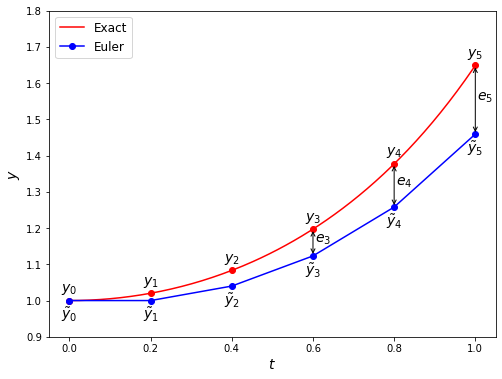

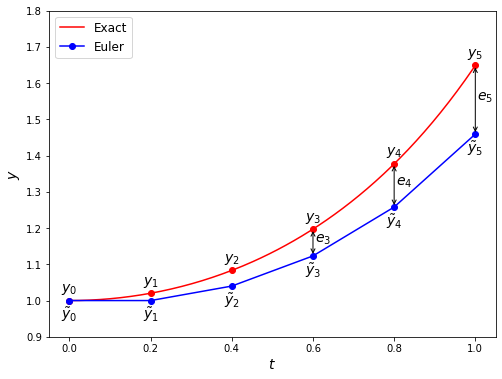

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from myst_nb import glue

def euler(f, tspan, y0, h):
    nsteps = int((tspan[1] - tspan[0]) / h)
    neq = len(y0)
    t = np.arange(nsteps + 1) * h
    y = np.zeros((len(t), len(y0)))
    y[0,:] = y0
    for n in range(nsteps):
        y[n+1,:] = y[n,:] + h * f(t[n], y[n,:])
        
    return t, y 

def f(t, y):
    return t * y

def exact(t):
    return np.exp(t ** 2 / 2)

# Define IVP
tspan = [0, 1]  # boundaries of the t domain
y0 = [1]        # solution at the lower boundary
h = 0.2         # step length

# Calculate the solution to the IVP
t, y = euler(f, tspan, y0, h)
    
# Plot solution
t1 = np.linspace(tspan[0], tspan[1], 200)
y1 = exact(t1)
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(t1, y1, "r-", label="Exact")
plt.plot(t, exact(t), "ro")
plt.plot(t, y, "bo-", label="Euler")
for i in range(len(t)):
    plt.text(t[i], y[i,0] - 0.05, rf"$\tilde{{y}}_{i}$", fontsize=14, ha="center")
    plt.text(t[i], exact(t[i])+0.025, f"$y_{i}$", fontsize=14, ha="center")
    if i > 2:
        plt.text(t[i]+0.005, y[i,0]/2 + exact(t[i])/2, f"$e_{i}$", fontsize=14)
        plt.annotate("", xy=(t[i],y[i]), xytext=(t[i],exact(t[i])), arrowprops=dict(arrowstyle="<->"))

plt.ylim([0.9, 1.8])
plt.xlabel("$t$", fontsize=14)
plt.ylabel("$y$", fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

glue("gte_fig", fig, display=False)

We can use the global and local truncations errors to analyse the accuracy of a method. Comparing the application of the Euler method using the exact and approximated solutions 

\begin{align*}
    y_{n+1} &= y_{n} + hf(t_n, y_n), \\
    \tilde{y}_{n+1} &= \tilde{y}_n + hf(t_n, \tilde{y}_n) + \tau_{n+1}
\end{align*}

and subtracting the first equation from the second gives

\begin{align*}
    y_{n+1} - \tilde{y}_{n+1} &= y_n - \tilde{y}_n + h(f(t_n, y_n) - f(t_n, \tilde{y}_n)) + \tau_{n+1} \\
    e_{n+1} &= e_n + h(f(t_n, y_n) - f(t_n, \tilde{y}_n)) + \tau_{n+1} 
\end{align*}

Assuming that $f(t,y)$ satisfies the [**Lipschitz condition**](https://en.wikipedia.org/wiki/Lipschitz_continuity) which is

\begin{align*}
    |f(t_n, y_n) - f(t_{n+1}, y_{n+1})| \leq L|y_n - y_{n+1}|,
\end{align*}

where $L$ is the **Lipschitz constant**, then it can be shown that $e_n$ satisfies

\begin{align*}
    |e_n| \leq \frac{\max_i (\tau_i)}{h} \left(\frac{\exp(L(t_n - t_0)) - 1}{L}\right).
\end{align*}

The term in the brackets is just some constant, $C$ say, and since $\tau = O(h^2)$ then

\begin{align*}
    |e_n| \leq C\frac{O(h^2)}{h} = O(h).
\end{align*} 

We can demonstrate this with the Euler method. The plot shown in {numref}`euler-hvalues-figure` below shows the solutions to the IVP from [the Euler method example](euler-example) calculated using step lengths of $h=0.2$, $h=0.1$, $h=0.05$ and $h=0.025$. As the step length decreases the numerical solution gets closer to the exact solution as expected.

```{glue:figure} euler_hvalues_fig
:name: euler-hvalues-figure

Solutions to the IVP $y'=ty$, $t\in[0,1]$, $y(0)=1$ using the Euler method with step lengths $h=0.2, 0.1, 0.05, 0.025$.
```

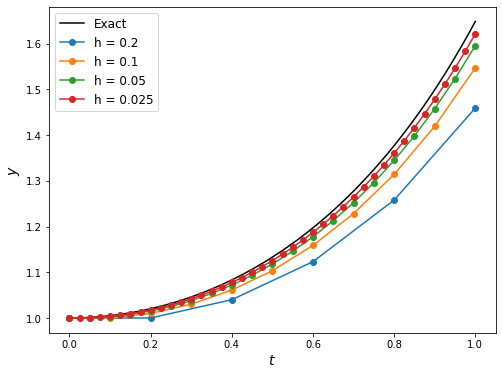

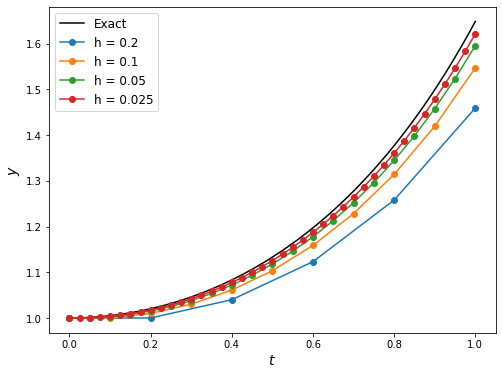

In [2]:
# Calculate solution for decreasing step lengths and plot the solution
hvalues = [0.2, 0.1, 0.05, 0.025]
errors = []
texact = np.linspace(tspan[0], tspan[1], 200)
yexact = exact(texact)
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(texact, yexact, "k", label="Exact")
for h in hvalues:
    t, y = euler(f, tspan, y0, h)
    plt.plot(t, y, "o-", label=f"h = {h}")
    errors.append(abs(yexact[-1] - y[-1,0]))
plt.xlabel("$t$", fontsize=14)
plt.ylabel("$y$", fontsize=14)
plt.legend(fontsize=12)
plt.show()

glue("euler_hvalues_fig", fig, display=False)

The global truncation errors for the solution to the IVP at $t=1$ are plotted against the values of the step length in {numref}`euler-gte-figure` below. Note how the errors approximate a straight line which show that has $h$ decreases, the errors also decrease in a linear fashion indicating that the Euler method is a first-order method.

```{glue:figure} euler_gte_fig
:name: euler-gte-figure

The global truncation errors for the Euler method solution of $y'=t y$, $y(0)=1$ at $t=1$.
```

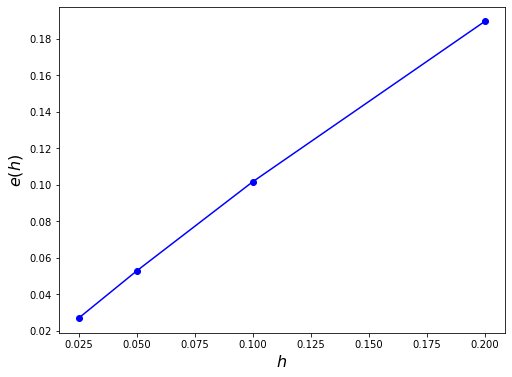

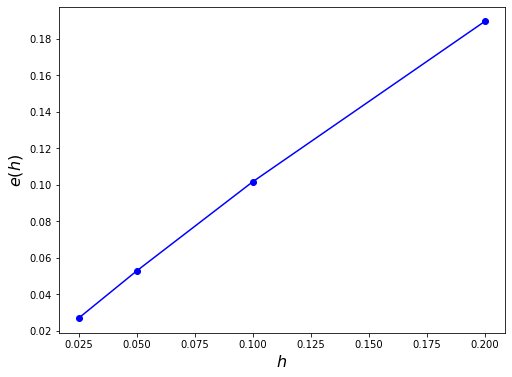

In [3]:
# Plot errors
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(hvalues, errors, 'bo-')
plt.xlabel("$h$", fontsize=16)
plt.ylabel("$e(h)$", fontsize=16)
plt.show()

glue("euler_gte_fig", fig, display=False)